# Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Import dataset

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')
test_original = test.copy()

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

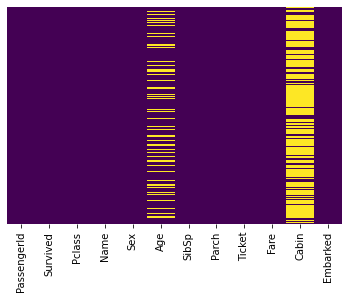

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

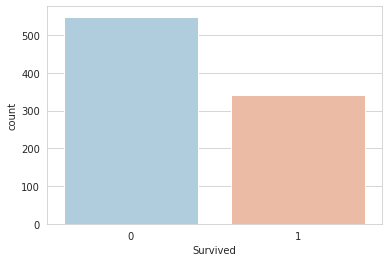

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

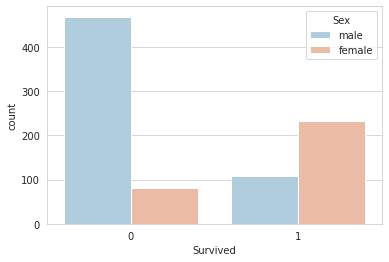

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

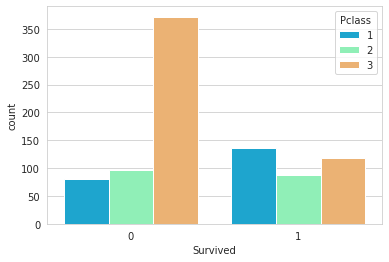

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

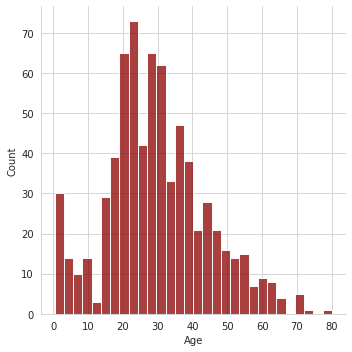

In [11]:
# dropna: delete null values
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)


<AxesSubplot:>

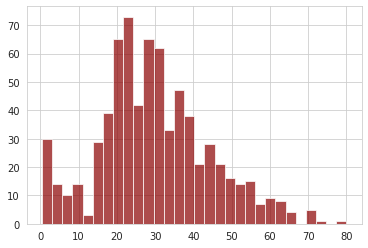

In [12]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

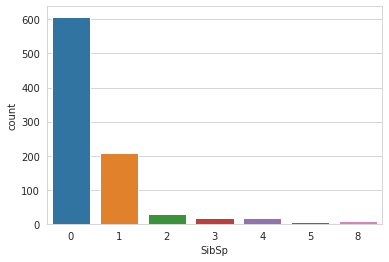

In [13]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

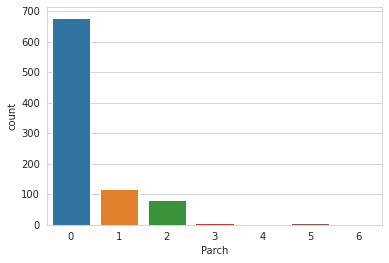

In [14]:
sns.countplot(x='Parch',data=train)

<AxesSubplot:>

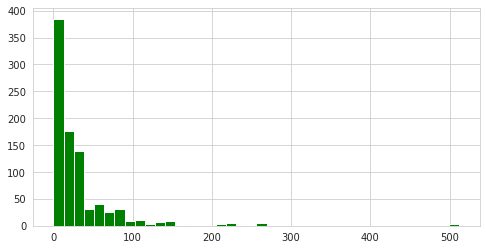

In [15]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Clean data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

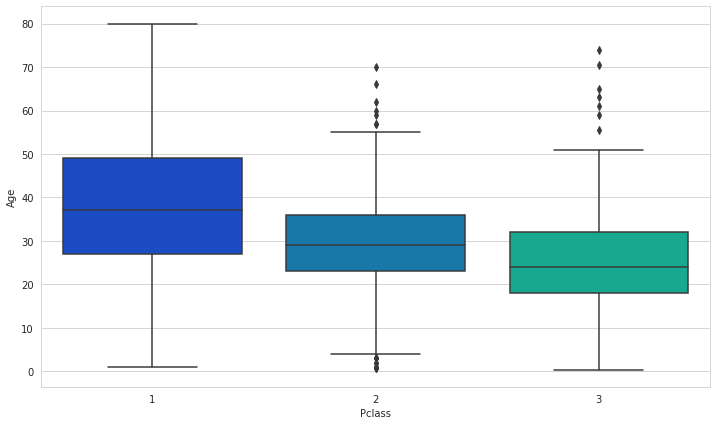

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [17]:
fil_no_null = pd.notnull(train['Age'])
edades = train[fil_no_null]

In [18]:
fil_no_null_fare = pd.notnull(train['Fare'])
tarifa = train[fil_no_null_fare]

In [19]:
fil_1ra = edades['Pclass'] == 1
pas_1ra = edades[fil_1ra]
# pasajeros de prumera clase
pas_1ra

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [20]:
fil_1ra_tarifa = tarifa['Pclass'] == 1
pas_1ra_tarifa = tarifa[fil_1ra_tarifa]
# pasajeros de prumera clase
pas_1ra_tarifa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [21]:
# Promedio de edades
pas_1ra['Age'].mean()

38.233440860215055

In [22]:
# Promedio de tarifa
pas_1ra_tarifa['Fare'].mean()

84.1546875

In [23]:
pas_1ra[['Age']].quantile([0.25, 0.5, 0.75])

,Age
0.25,27.0
0.50,37.0
0.75,49.0


In [24]:
fil_2da = edades['Pclass'] == 2
pas_2da = edades[fil_2da]
# pasajeros de prumera clase
pas_2da['Age'].mean()

29.87763005780347

In [25]:
fil_2da_tarifa = tarifa['Pclass'] == 2
pas_2da_tarifa = tarifa[fil_2da_tarifa]
# pasajeros de prumera clase
pas_2da_tarifa['Fare'].mean()

20.662183152173913

In [26]:
pas_2da[['Age']].quantile([0.25, 0.5, 0.75])

,Age
0.25,23.0
0.50,29.0
0.75,36.0


In [27]:
fil_3ra = edades['Pclass'] == 3
pas_3ra = edades[fil_3ra]
# pasajeros de prumera clase
pas_3ra['Age'].mean()

25.14061971830986

In [28]:
fil_3ra_tarifa = tarifa['Pclass'] == 3
pas_3ra_tarifa = tarifa[fil_3ra_tarifa]
# pasajeros de prumera clase
pas_3ra_tarifa['Fare'].mean()

13.675550101832993

In [29]:
pas_3ra[['Age']].quantile([0.25, 0.5, 0.75])

,Age
0.25,18.0
0.50,24.0
0.75,32.0


In [30]:
# Imputar datos de la clase a partir de la mediana de la edad
def imputar_edad(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [31]:
# Imputar datos de la clase a partir de la mediana de la tarifa
def imputar_tarifa(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):

        if Pclass == 1:
            return 84

        elif Pclass == 2:
            return 21

        else:
            return 14

    else:
        return Fare

In [32]:
train['Age'] = train[['Age','Pclass']].apply(imputar_edad,axis=1)
test['Age'] = test[['Age','Pclass']].apply(imputar_edad,axis=1)
test['Fare'] = test[['Fare','Pclass']].apply(imputar_tarifa,axis=1)

<AxesSubplot:>

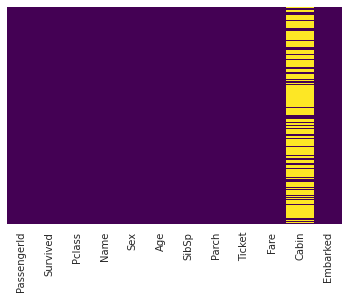

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

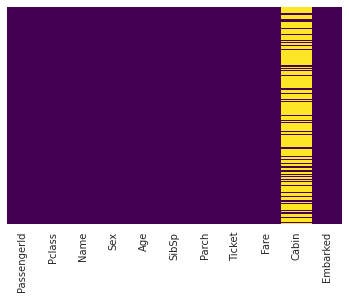

In [34]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
# Elimina la columna cabina
# inplace: toma efecto sobre el mismo dataFrame
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

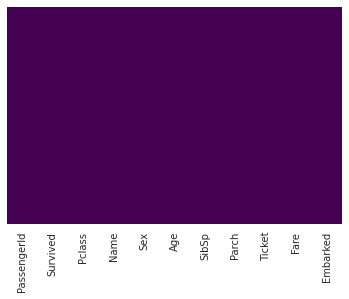

In [38]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
# Elimina finas con datos faltantes
train.dropna(inplace=True)

<AxesSubplot:>

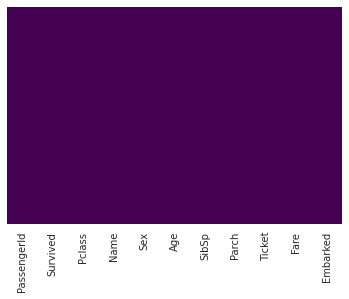

In [40]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Convert categoricals to dummy

In [41]:
def convert_categorical_to_dummy(dataframe):
    dataframe.info()
    # Valores que tiene Sex
    dataframe['Sex'].unique()
    # Valores que tiene Embarked
    dataframe['Embarked'].unique()
    dataframe.head()
    # Convertir variables dummies (0-1) crea nuevas columnas
    pd.get_dummies(dataframe['Sex'])
    pd.get_dummies(dataframe['Embarked'],drop_first=True)
    
    # drop_first=True: elimina la primera columna categórica
    # crea columnas sex y embark con variables dummies
    sex = pd.get_dummies(dataframe['Sex'],drop_first=True)
    embark = pd.get_dummies(dataframe['Embarked'],drop_first=True)
    
    # Elimina 4 columnas
    dataframe.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)
    
    # Agrega 2 columnas, axis = 1
    dataframe = pd.concat([dataframe,sex,embark],axis=1)
    
    # Guardando datos procesados
    #train.to_csv('titanic_procesado.csv')
    return dataframe
    

In [42]:
train = convert_categorical_to_dummy(train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [43]:
test = convert_categorical_to_dummy(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [46]:
train.head(15)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


# Using Logistic Regression

In [47]:
X = train.drop('Survived',axis=1)

In [48]:
y = train['Survived']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# train_size: % de datos para entrenamiento
# test_size: % de datos para pruebas
# random_state: semilla
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30,
                                                    random_state=101,
                                                    stratify=y
                                                   )

In [51]:
X_train.shape

(622, 8)

In [52]:
X_test.shape

(267, 8)

In [53]:
y_train.shape

(622,)

In [54]:
y_test.shape

(267,)

## Predict

In [55]:
# Algoritmo para clasificación binaria
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression(max_iter = 500)

In [57]:
params = logmodel.get_params()
params

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [58]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [59]:
# Iteraciones con las que el modelo llegó a converger
print("LogisticRegression iterations:", logmodel.n_iter_)

LogisticRegression iterations: [130]


In [60]:
predictions = logmodel.predict(X_test)

## Result

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,predictions)

array([[142,  23],
       [ 33,  69]])

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       165
           1       0.75      0.68      0.71       102

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [65]:
from sklearn.metrics import plot_confusion_matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


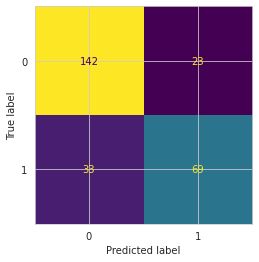

In [66]:
plot_confusion_matrix(logmodel, X_test, y_test, colorbar=False)

In [67]:
from sklearn.metrics import plot_roc_curve

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


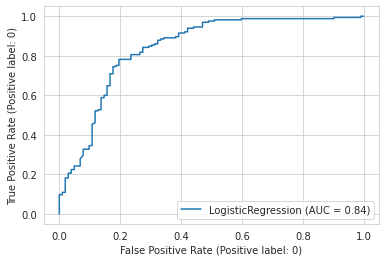

In [68]:
plot_roc_curve(logmodel, X_test, y_test, pos_label=0)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


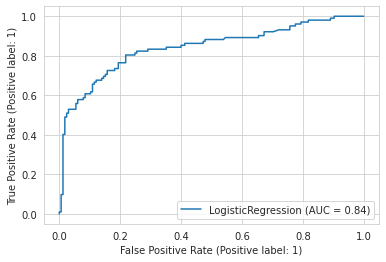

In [69]:
plot_roc_curve(logmodel, X_test, y_test, pos_label=1)

## Predict with test.csv

In [70]:
predictions_test = logmodel.predict(test)
result = pd.DataFrame({'PassengerId': test_original['PassengerId'], 'Survived': predictions_test})

In [71]:
#gender_submission

In [72]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Saving result to csv

In [73]:
# Guardando datos procesados
result.to_csv('submmit.csv', index = False)